In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt
plt.ion()

# Descente de Gradient en $D=1$

In [3]:
## On minimise une fonction très simple, ici, une simple parabole
def J(theta):
    return (theta+1)**2

# il faut calculer à la main la dérivée de J, et la taper ici:
def gradient_de_J_par_rapport_a_son_argument(theta):
    return 2*(theta+1) # il faut calculer à la main la dérivée de J, et la taper ici

In [4]:
thetaRange = np.linspace(-3,2,51)
thetaRange


array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [5]:
J(3.0)

16.0

In [6]:
## numpy = NUMerical PYthon

In [7]:
J(np.array([2,3,13]))
## python fait du broadcasting: j'avais pensé J
# comme une fonction de 1 reel
## mais en lui passant un tableau a 1D, il calcule
# pour chaque valeur du tableau et renvoi le tableau

array([  9,  16, 196])

In [8]:
theta0 = 0.3 # valeur initiale

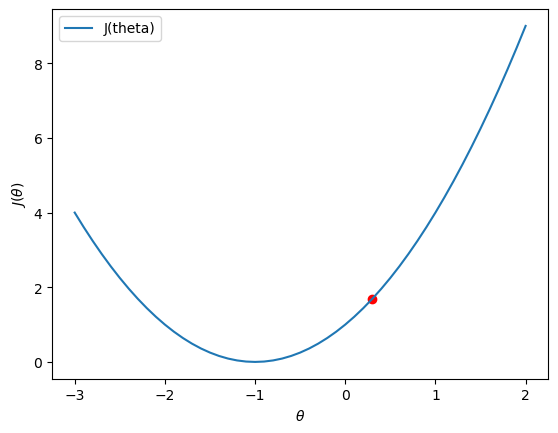

In [9]:
# on trace la fonction J(theta), et l'emplacement du point initial, theta0, 
## dont le cout associé est J(theta)
plt.plot(thetaRange, J(thetaRange), label="J(theta)")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J(\theta)$")
plt.scatter([theta0], [J(theta0)],color='red')
plt.legend()

$\eta$

In [10]:
theta0 = 2
eta = 0.2  # taux d'apprentissage 
epochMax = 7

$\vec w \to \vec  w - \eta \vec \nabla_{\vec w} J(w,X)$

In [11]:
def descente_de_gradient_avec_plot(theta0, eta, epochMax):
    theta = theta0 # valeur initiale
    
    ## astuces pour faire un tracé avec dégradé de couleur
    cmap = cm.jet # palettes de couleurs: jet, gist_rainbow, Dark2
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 

    plt.plot(thetaRange, J(thetaRange), label="J(theta)")
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$J(\theta)$")
    plt.scatter([theta0], [J(theta)],color='black')
    for epoch in range(epochMax):
        DeplacementDeTheta = \
        -eta * gradient_de_J_par_rapport_a_son_argument(theta)
        plt.arrow(theta, J(theta), DeplacementDeTheta, 0, width=0.025, length_includes_head=True)
        theta += DeplacementDeTheta
        colorvariable = tuple(gradient[epoch])
        plt.scatter([theta], [J(theta)],color=colorvariable)
    return theta

In [12]:
gradient_de_J_par_rapport_a_son_argument(2-1.2)*0.2

0.7200000000000001

In [13]:
0.8-0.72

0.08000000000000007

-0.9160192

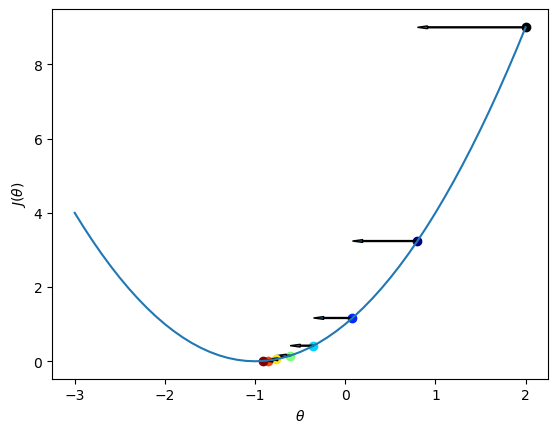

In [14]:
# on part de 2, et on descend efficacmeent vers le minimum, en theta=-1
theta0 = 2
eta = 0.2
epochMax=7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

-1.6291456000000006

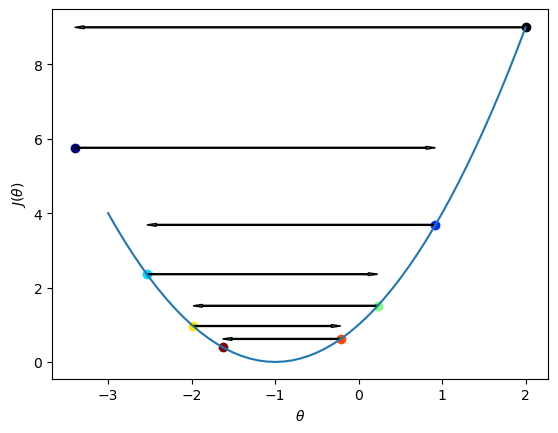

In [15]:
# eta est un peu trop grand, on rebondit mais on finit par converger
theta0 = 2
eta = 0.9
epochMax=7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

-11.74954240000001

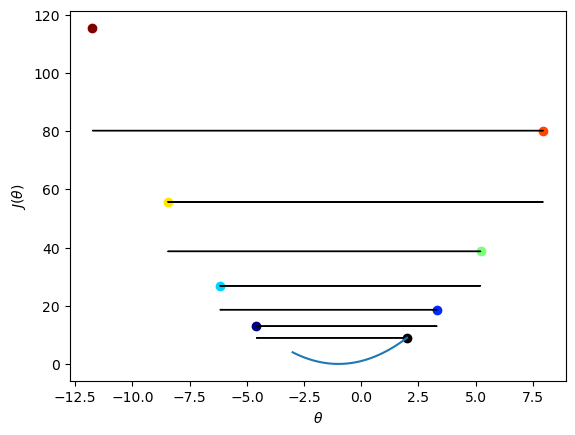

In [16]:
# eta est NETTEMENT trop grand, on rebondit et on diverge
theta0 = 2
eta = 1.1 # taux d'apprentissage 
epochMax = 7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

-0.3708544000000001

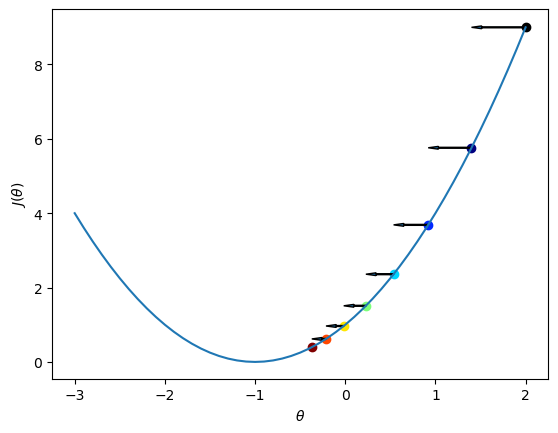

In [17]:
# eta est trop petit, on converge mais trop lentement
theta0 = 2
eta = 0.1 # taux d'apprentissage 
epochMax = 7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

# Descente de Gradient en $D=2$

$J_2(\theta_0 , \theta_1) = \sin\left(\sqrt{ \theta_0^2 + \theta_1^2}\right)$

In [18]:
# on va minimiser cette fonction J2:
def J2(theta):
    X=theta[0]
    Y=theta[1]
    u = np.sqrt(X**2 + Y**2)
    Jvalue = np.sin(u)
    return Jvalue # ceci est un float

# il faut calculer à la main le gradient de J, et le taper ici:
def gradient_de_J2_par_rapport_a_son_argument(theta):
    u = np.sqrt(theta[0]**2 + theta[1]**2) # =(X**2 + Y**2)^(1/2)
    ## aide: 
    ## du/dX = 1/2 * (X**2 + Y**2)^(1/2-1)*2*X
    ##       = 1 * (1/u)                  *  X
    Jgrad = np.array(\
                     [np.cos(u)*theta[0]/u ,\
                      np.cos(u)*theta[1]/u])
    return Jgrad # ceci est un tableau à D=2 valeurs (entrées, composantes, ...)
    

In [19]:
# inspiré de : https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
def plot_surface(fonction):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X = np.arange(-1, 5, 0.25)   # joue le role de theta0
    Y = np.arange(-1, 7, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    # Plot the surface:
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1, antialiased=False)
    ax.set_zlim(-1.01, 1.01)   # Customize the z axis.
    fig.colorbar(surf, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.
    return fig, ax
#     plt.show()    

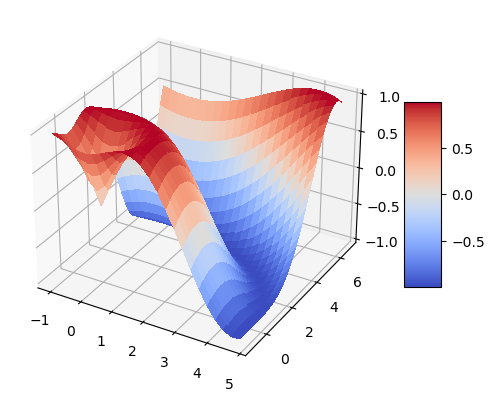

In [20]:
fig, ax = plot_surface(J2)

In [21]:
def plot_niveaux(fonction):
    X = np.arange(-5, 7, 0.25)   # joue le role de theta0
    Y = np.arange(-5, 5, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    plt.contourf(X,Y,Z, cmap=cm.coolwarm,levels=40)
    return fig, ax    

(<Figure size 640x480 with 2 Axes>, <Axes3DSubplot:>)

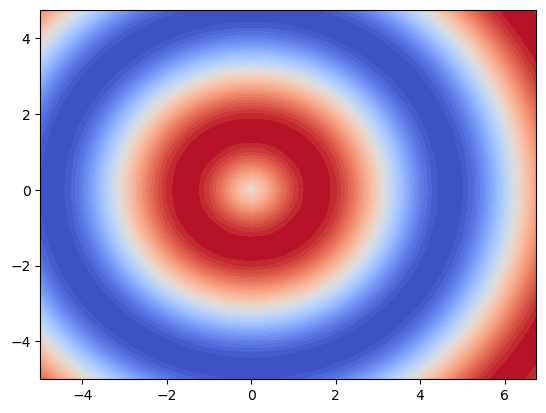

In [22]:
plot_niveaux(J2)

$\vec \theta \to \vec  \theta - \eta \vec \nabla_{\vec \theta} J(\theta,X)$

In [23]:
def descente_de_gradient_avec_plot(theta0, eta, epochMax):
    theta = theta0 # valeur initiale
    
    ## astuces pour faire un tracé avec dégradé de couleur
    cmap = cm.jet # palettes de couleurs: jet, gist_rainbow, Dark2
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 
    
    ## preparation de la figure
    fig, ax = plot_niveaux(J2)
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    # la descente de gradient elle meme:
    for epoch in range(epochMax):
        DeplacementDeTheta = \
        -eta * gradient_de_J2_par_rapport_a_son_argument(theta) # array D=2 dimensionel 
        ancien_theta = theta.copy() # c'est juste pour les plots
        theta += DeplacementDeTheta
        
        # plt.arrow(ancien_theta[0], ancien_theta[1], theta[0], theta[1], width=0.025, length_includes_head=True)
        colorvariable = tuple(gradient[epoch])
        plt.scatter( [theta[0]], [theta[1]] ,color=colorvariable)
        print(J2(theta))

In [24]:
epochMax=10

0.9998069333631268
0.9993031304601308
0.997485616789848
0.9909401934308634
0.9675157074439384
0.885552522891023
0.6206698422633268
-0.03606027975636738
-0.8048856528089182
-0.9948809578615984
-0.9999471800616988
-0.9999994716286015
-0.9999999947162688
-0.9999999999471627
-0.9999999999994716
-0.9999999999999947
-1.0
-1.0
-1.0
-1.0


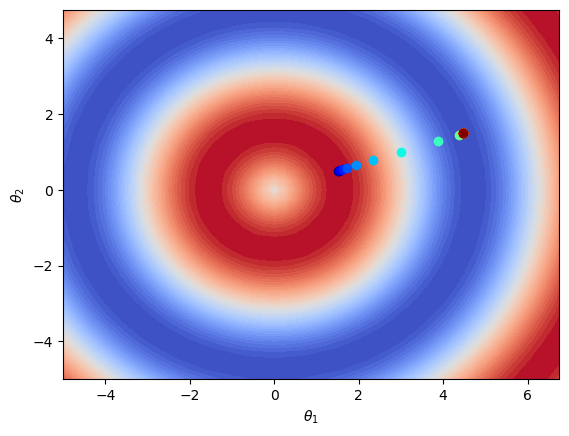

In [25]:
# ici, tout va bien
eta=0.9
epochMax = 20
theta0 = np.array([1.5,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

0.9994523904554572
0.9943986109958126
0.9432799578129264
0.4811609617940714
-0.9896234940901267
-0.9852576444875333
-0.9791734404965977
-0.9708104315452292
-0.9595332248966583
-0.9447210550092884
-0.9259428304790042
-0.9032174387606285
-0.8772876308045757
-0.849737997801209
-0.8227617831779035
-0.7985543250988929
-0.778625906398265
-0.7634546005461487
-0.7526332385795143
-0.7452918737235262


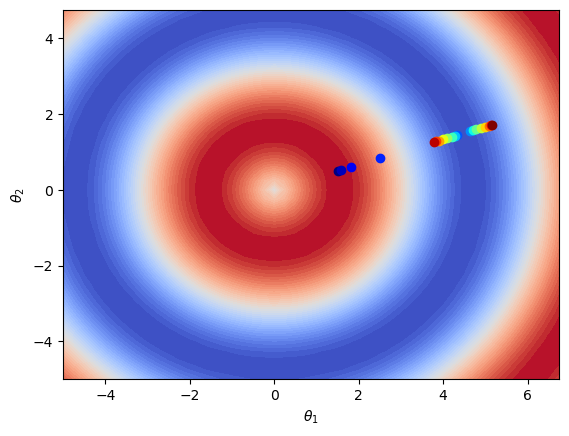

In [26]:
# ici, le taux d'apprentissage \eta est un peu grand: on rebondit un peu contre la paroi d'en face
## mais on descend quand meme a peu près dans le fossé
eta=2.2
epochMax=20
theta0 = np.array([1.5,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

0.9647071497550364
0.9217876320815713
0.8298388505514791
0.6440779134718899
0.3120379363474039
0.15704469895470058
0.32980616470921176
0.13550791821667438
0.35177070768403385
0.10836782506641524
0.3787769086726666
0.07420136986971804
0.41173035121893975
0.03129573983889661
0.45150758843966426
0.022318740507389356
0.4596089697130631
0.0334879041932268
0.4495177489366335
0.019588442223751473


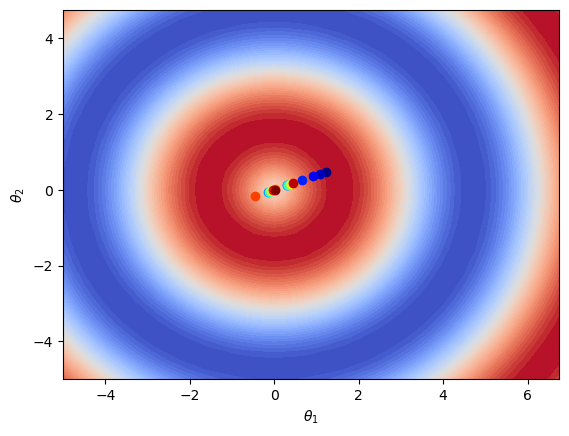

In [27]:
## ici on part d'un point qui est dans le "bassin d'attraction" (c'est le vrai terme mathématique)
## du minimum situé en (0,0)
## eta est assez petit pour qu'on converge à peu près dedans. 
eta=0.5
theta0 = np.array([1.3,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

0.861795852127275
0.024286499499063096
0.9193682037266674
0.370618780882218
-0.9956877741211985
-0.9957125216078029
-0.9957369861239302
-0.9957611725015058
-0.9957850854629616
-0.9958087296243239
-0.9958321094981942
-0.9958552294966327
-0.995878093933945
-0.9959007070293758
-0.9959230729097158
-0.9959451956118207
-0.9959670790850511
-0.995988727193631
-0.996010143718931
-0.9960313323616796


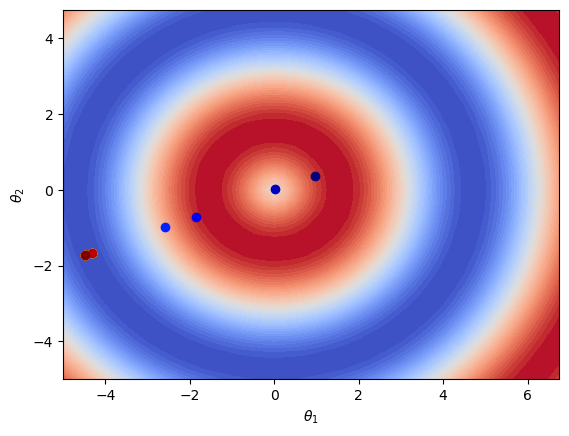

In [28]:
## Et on peut sortir du bassin d'attaction, si eta est assez grand:
eta=2
theta0 = np.array([1.3,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

#### On re-defini la fonction plot_niveaux pour y voir plus clair

In [29]:
def plot_niveaux(fonction):
    X = np.arange(-7, 7, 0.25)   # joue le role de theta0
    Y = np.arange(-5, 5, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    plt.contourf(X,Y,Z, cmap=cm.coolwarm,levels=40)
    return fig, ax    

0.861795852127275
0.024286499499063096
0.9193682037266674
0.370618780882218
-0.9956877741211985
-0.9957125216078029
-0.9957369861239302
-0.9957611725015058
-0.9957850854629616
-0.9958087296243239
-0.9958321094981942
-0.9958552294966327
-0.995878093933945
-0.9959007070293758
-0.9959230729097158
-0.9959451956118207
-0.9959670790850511
-0.995988727193631
-0.996010143718931
-0.9960313323616796


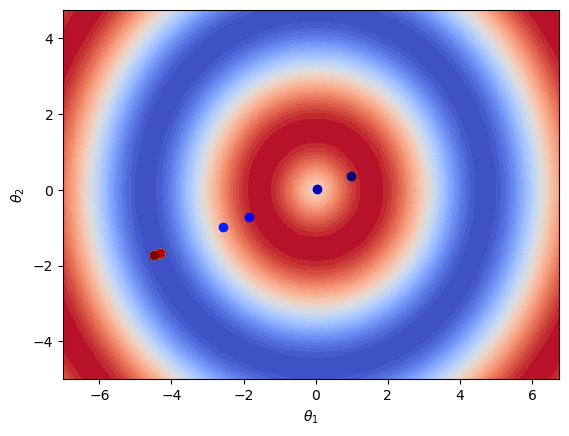

In [30]:
## Et on peut sortir du bassin d'attaction, si eta est assez grand:
eta=2
theta0 = np.array([1.3,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

## Crédits
### Topo sur la descente de Gradient 
#### fait par François Landes